# 1. Data Quality

In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### A. Provide an example of poor quality structured data

In [5]:
def create_enhanced_poor_quality_data(n=5000):
    data = {
        'ID': list(range(n)),  # Unique identifier
        'Date': [],
        'Amount': [],
        'Category': [],
        'Currency': [],
        'Description': []
    }

    categories = ['Food', 'Transport', 'Entertainment', 'Health']
    currencies = ['USD', 'EUR', 'GBP']
    current_year = datetime.now().year

    for i in range(n):
        # Creation of date with inconsistent formats and outdated information
        if random.random() < 0.2:
            date = np.random.choice(['01/01/2023', '2023-01-01', 'Jan 01, 2023'])
        else:
            date = datetime(current_year - random.randint(0, 5), random.randint(1, 12), random.randint(1, 28))  # Some outdated dates
            date = date.strftime(random.choice(['%m/%d/%Y', '%Y-%m-%d', '%b %d, %Y']))
        
        # Amount with inaccuracies, missing values, and extreme values
        if random.random() < 0.1:
            amount = np.nan  # Missing value
        else:
            amount = round(random.uniform(0, 1000), 2)
            if random.random() < 0.05:  # Introduce inaccuracies
                amount *= random.choice([-1, 1.5, 0.5])
            if random.random() < 0.01:  # Extreme values for bias
                amount = random.choice([1000000, -1000000])
        
        # Category with typos, missing entries, and ambiguity
        if random.random() < 0.1:
            category = ''  # Missing category
        else:
            category = random.choice(categories)
            if random.random() < 0.05:  # Introduce typos
                category = category.replace('o', '0').replace('e', '3')
            if random.random() < 0.03:  # Ambiguity - mixed categories
                category += ' and ' + random.choice(categories)
        
        # Currency with inconsistencies
        currency = random.choice(currencies)
        if random.random() < 0.05:
            currency = random.choice(['XXX', 'YYY'])  # Unknown or incorrect currency
        
        # Description with data entry errors and lack of uniformity
        if random.random() < 0.1:
            description = ''  # Missing description
        else:
            description = f"Purchase of {category.lower()} item in {random.choice(['New York', 'London', 'Tokyo'])}"
            if random.random() < 0.05:  # Introduce typographical errors
                description = description.replace('e', '3').replace('o', '0')
            if random.random() < 0.05:  # Lack of uniformity in capitalization
                description = description.upper()
        
        data['Date'].append(date)
        data['Amount'].append(amount)
        data['Category'].append(category)
        data['Currency'].append(currency)
        data['Description'].append(description)

    # Introduce duplicates and data integrity issues
    for _ in range(100):
        idx = random.randint(0, n-1)
        data['ID'].append(data['ID'][idx])  # Duplicate ID
        data['Date'].append(data['Date'][idx])
        data['Amount'].append(data['Amount'][idx])
        data['Category'].append(data['Category'][idx])
        data['Currency'].append(data['Currency'][idx])
        data['Description'].append(data['Description'][idx])

    return pd.DataFrame(data)


In [6]:
df = create_enhanced_poor_quality_data()

### Analyzing structured data

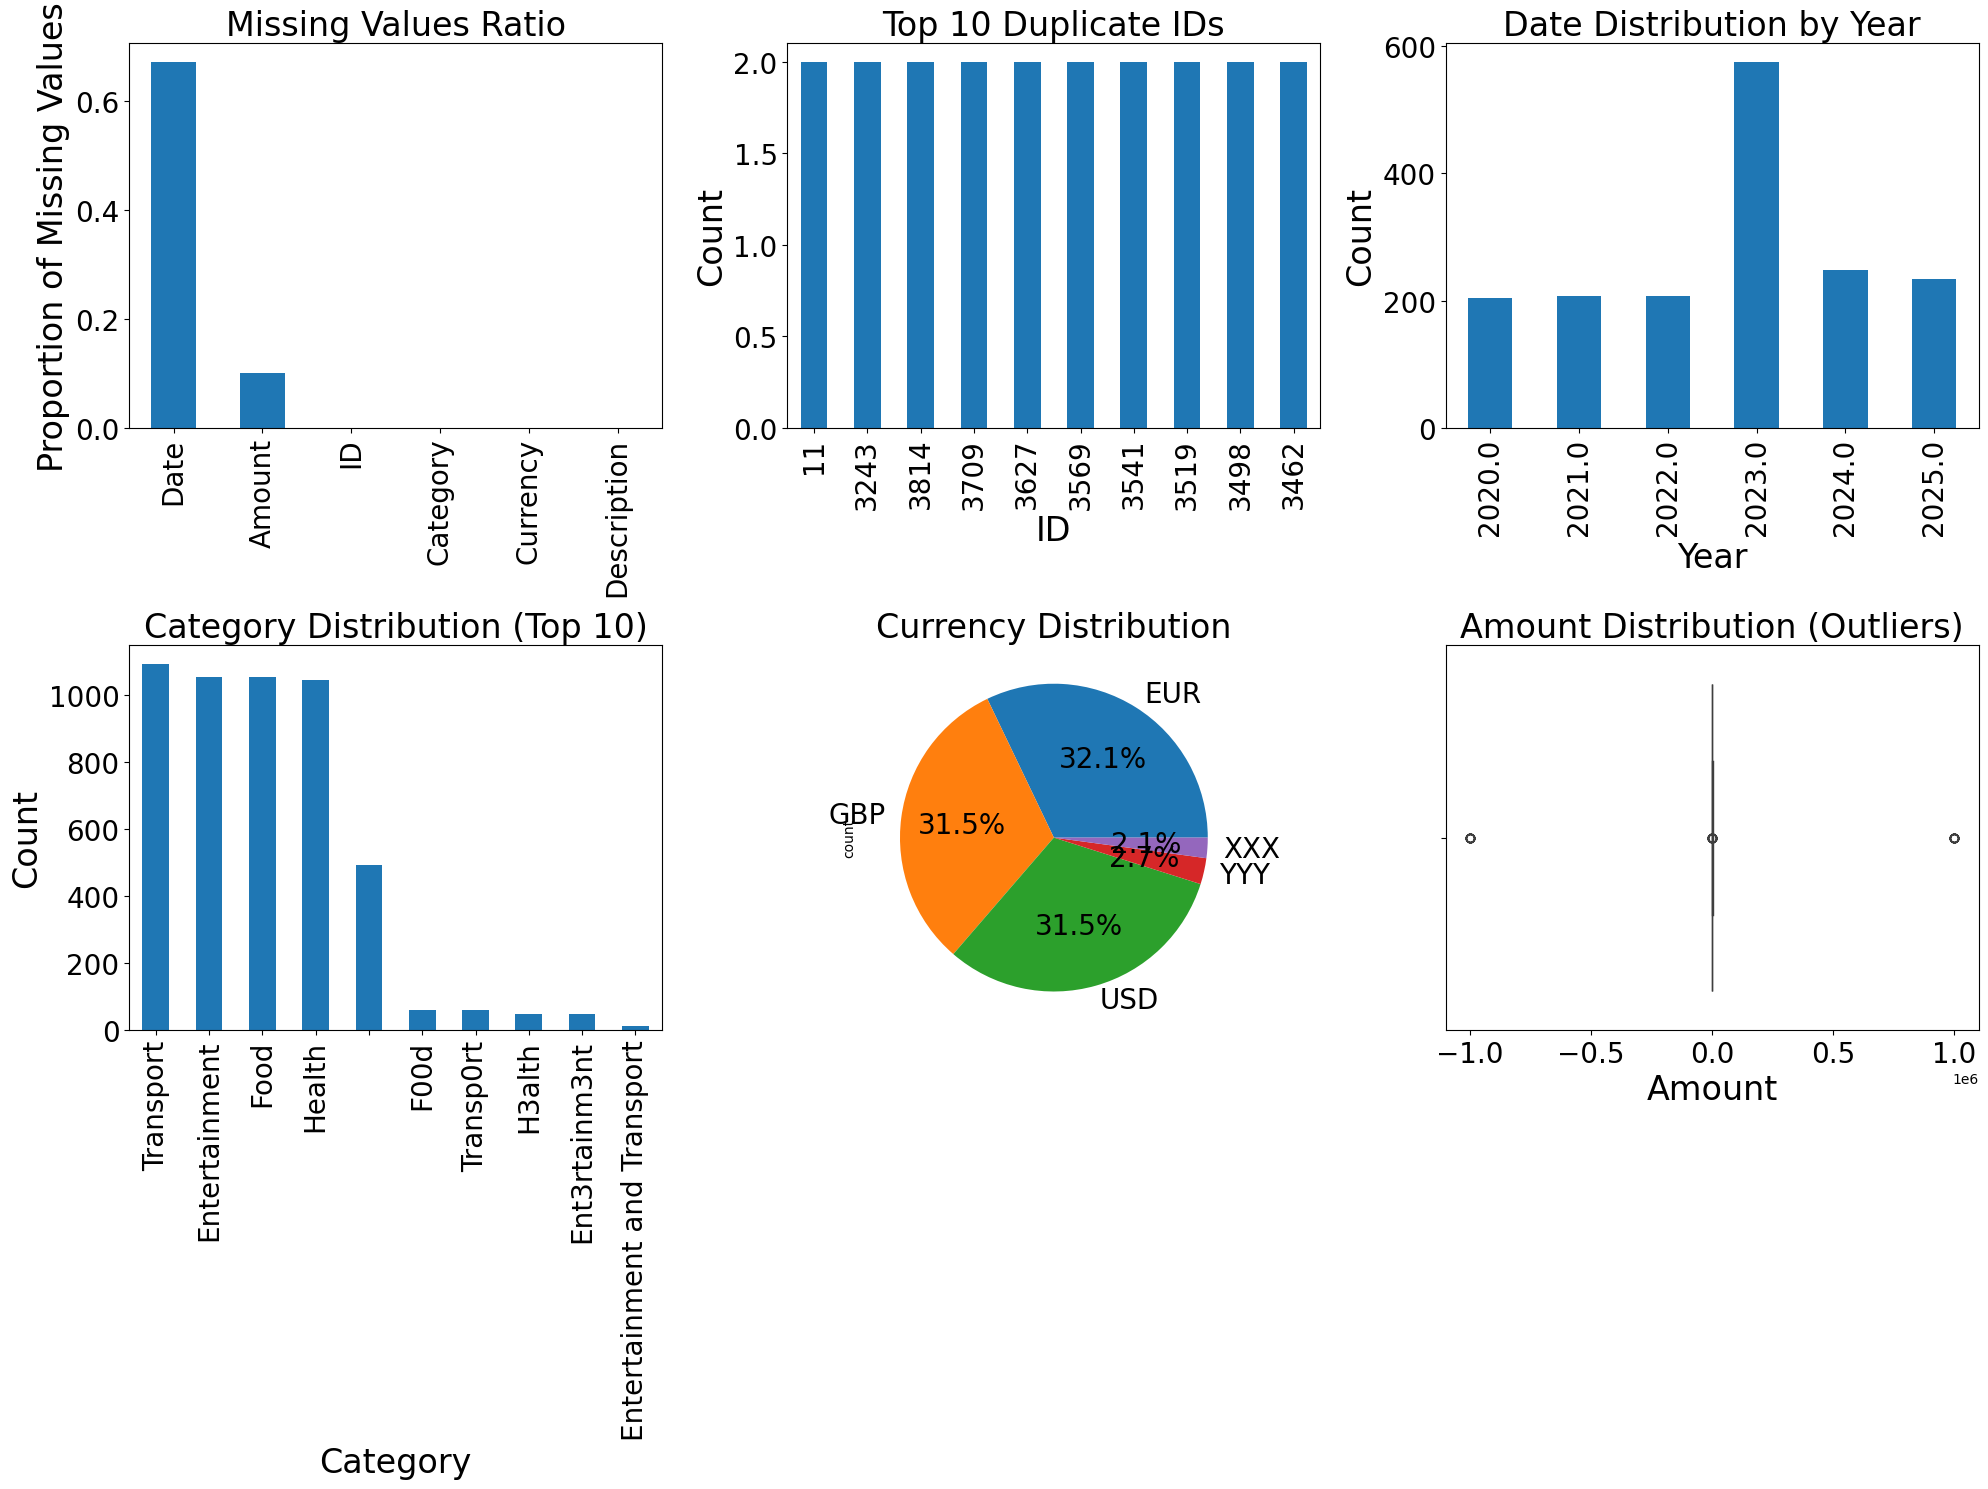

In [7]:
# Ensure all date entries are Python strings
df['Date'] = df['Date'].apply(lambda x: str(x))

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# 1. Missing Values
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Missing Values Ratio', fontsize=24)
axes[0, 0].set_ylabel('Proportion of Missing Values', fontsize=24)
axes[0, 0].tick_params(axis='x', labelsize=20)
axes[0, 0].tick_params(axis='y', labelsize=20)

# 2. Duplicates
duplicates = df[df.duplicated(subset='ID', keep=False)]
duplicates['ID'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Duplicate IDs', fontsize=24)
axes[0, 1].set_xlabel('ID', fontsize=24)
axes[0, 1].set_ylabel('Count', fontsize=24)
axes[0, 1].tick_params(axis='x', labelsize=20)
axes[0, 1].tick_params(axis='y', labelsize=20)

# 3. Date Distribution by Year
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Date Distribution by Year', fontsize=24)
axes[0, 2].set_xlabel('Year', fontsize=24)
axes[0, 2].set_ylabel('Count', fontsize=24)
axes[0, 2].tick_params(axis='x', labelsize=20)
axes[0, 2].tick_params(axis='y', labelsize=20)

# 4. Category Distribution
df['Category'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Category Distribution (Top 10)', fontsize=24)
axes[1, 0].set_xlabel('Category', fontsize=24)
axes[1, 0].set_ylabel('Count', fontsize=24)
axes[1, 0].tick_params(axis='x', labelsize=20)
axes[1, 0].tick_params(axis='y', labelsize=20)

# 5. Currency Distribution
df['Currency'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1], textprops={'fontsize': 20})
axes[1, 1].set_title('Currency Distribution', fontsize=24)
axes[1, 1].tick_params(axis='x', labelsize=20)
axes[1, 1].tick_params(axis='y', labelsize=20)

# 6. Amount Distribution (Outliers)
sns.boxplot(x=df['Amount'], ax=axes[1, 2])
axes[1, 2].set_title('Amount Distribution (Outliers)', fontsize=24)
axes[1, 2].set_xlabel('Amount', fontsize=24)
axes[1, 2].tick_params(axis='x', labelsize=20)
axes[1, 2].tick_params(axis='y', labelsize=20)

# Adjust layout
plt.tight_layout()
plt.show()


### C. Provide an example of poor quality unstructured data

In [8]:
from faker import Faker # Importing Faker to create fake data
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [9]:
fake = Faker()

def create_poor_quality_unstructured_data(n=5000):
    data = {
        'Text': []
    }

    for _ in range(n):
        sentence = []
        
        # Date
        if random.random() < 0.8:
            sentence.append(fake.date_this_decade())
        else:
            sentence.append(fake.date_between_dates(date_start=datetime(2000, 1, 1), date_end=datetime(2010, 12, 31)))
        
        # Category with some noise
        category = fake.word().capitalize()
        if random.random() < 0.1:
            category = category.replace('a', '@').replace('e', '3')
        sentence.append(category)
        
        # Amount with potential inaccuracies
        # Ensure min_value is positive when positive=True
        amount = fake.pyfloat(right_digits=2, positive=True, min_value=0.01, max_value=1000)
        if random.random() < 0.05:
            amount *= random.choice([-1, 1.5, 0.5])
        sentence.append(f"${amount}")
        
        # Location
        if random.random() < 0.9:
            sentence.append(fake.city())
        else:
            sentence.append("Unknown")
        
        # Combine into unstructured text with errors
        combined_text = " ".join(map(str, sentence))
        if random.random() < 0.1:  # Introduce missing data
            combined_text = ''
        if random.random() < 0.05:  # Introduce typos
            combined_text = combined_text.replace('e', '3').replace('o', '0')
        if random.random() < 0.1:  # Introduce duplicate sentences
            combined_text += ' ' + combined_text
        
        data['Text'].append(combined_text)

    return pd.DataFrame(data)

df_unstructured = create_poor_quality_unstructured_data()

### Analyzing unstructured data

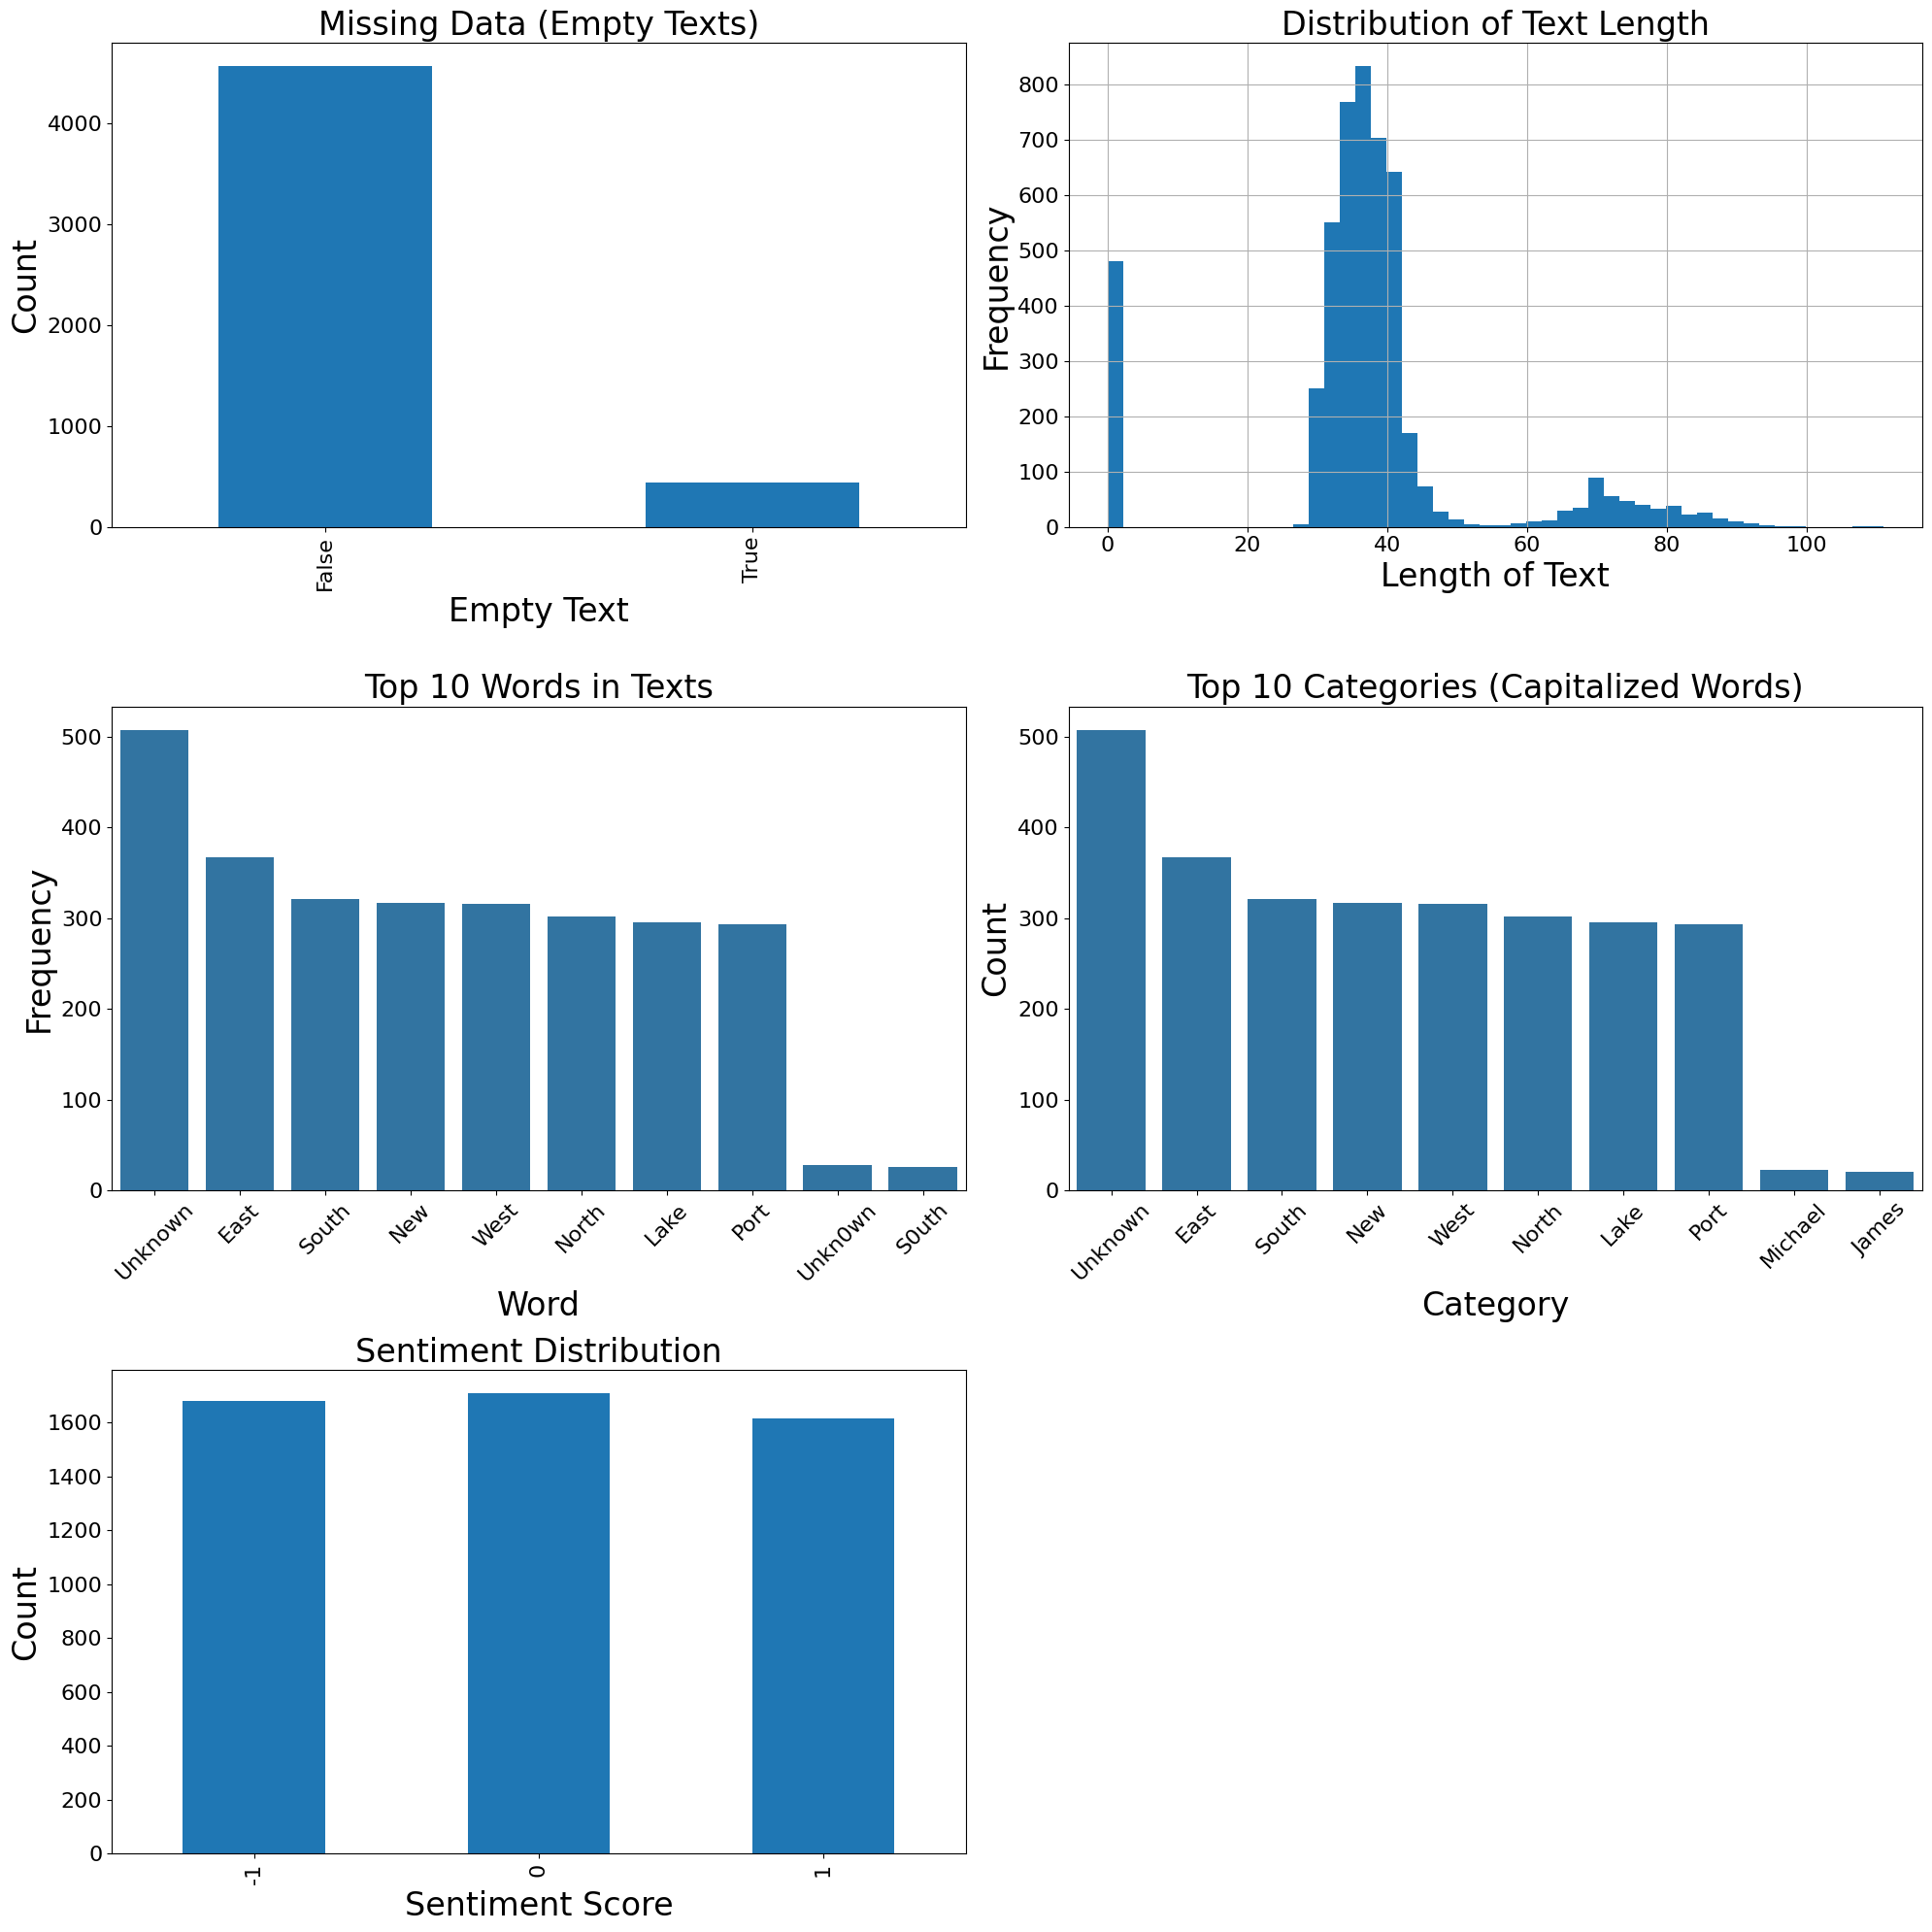

In [10]:
def analyze_and_visualize_unstructured_data(df):
    plt.figure(figsize=(20, 20))

    # Missing Data (empty texts)
    plt.subplot(3, 2, 1)
    empty_texts = df['Text'].apply(len) == 0
    empty_texts.value_counts().plot(kind='bar')
    plt.title('Missing Data (Empty Texts)', fontsize=24)
    plt.xlabel('Empty Text', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Length of Texts
    plt.subplot(3, 2, 2)
    df['Text'].str.len().hist(bins=50)
    plt.title('Distribution of Text Length', fontsize=24)
    plt.xlabel('Length of Text', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Word Frequency Analysis
    all_words = ' '.join(df['Text']).split()
    word_counts = Counter(all_words)
    plt.subplot(3, 2, 3)
    sns.barplot(x=[k for k, _ in word_counts.most_common(10)], y=[v for _, v in word_counts.most_common(10)])
    plt.title('Top 10 Words in Texts', fontsize=24)
    plt.xlabel('Word', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Categories (Using words as pseudo-categories)
    categories = [word for word in all_words if word.istitle()]
    plt.subplot(3, 2, 4)
    category_counts = Counter(categories)
    sns.barplot(x=[k for k, _ in category_counts.most_common(10)], y=[v for _, v in category_counts.most_common(10)])
    plt.title('Top 10 Categories (Capitalized Words)', fontsize=24)
    plt.xlabel('Category', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Sentiment Analysis (simplified)
    sentiment_scores = [random.choice([-1, 0, 1]) for _ in range(len(df))]  # Placeholder for real sentiment analysis
    plt.subplot(3, 2, 5)
    df['Sentiment'] = sentiment_scores
    df['Sentiment'].value_counts().sort_index().plot(kind='bar')
    plt.title('Sentiment Distribution', fontsize=24)
    plt.xlabel('Sentiment Score', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.show()

analyze_and_visualize_unstructured_data(df_unstructured)